In [1]:
#importing libraries
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind,levene,shapiro,mannwhitneyu,ttest_1samp
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

In [2]:
#importing dataset
df=pd.read_excel('SM4-Golf.xls')

In [25]:
df.head()#checking whether data got loaded correctly or not

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


In [4]:
#checking for null values and count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
Current    40 non-null int64
New        40 non-null int64
dtypes: int64(2)
memory usage: 720.0 bytes


In [5]:
#descriptive statistics analytics-gives the mean/std and other 5 point stat values
df.describe()

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


we get to know that standard deviation for current product and new product is nothing peculiar to identify. Also,looking at min and max values, the new product has not performed very well commpared to current based on the sample data set we have here. 

Here as per the question, we have null hypothesis as there is no significance difference between two samples and alternate hypothesis is there is a significane difference in mean of the samples - for new and current balls. 

This implies that null hypothesis - H0 is -> New Golf Ball Introduction is Not Required 
                                    Ha is -> There is a requirement of introduction of a new golf ball.
                                    
Since, we have two samples i.e. observations from tests done for new ball and current ball, we can go for two sample t test for analyzing the hypothesis stated above

In [6]:
t_stats,p_values=ttest_ind(df['Current'],df['New'])

In [7]:
print(t_stats,p_values)

1.3283615935245678 0.18793228491854663


p>0.05 implying that we have failed to reject the null hypothesis test. 

In [22]:
#another way of checking p value for two sample t test
u,p_value=mannwhitneyu(df['Current'],df['New'])
print(u,p_value)

668.0 0.10265192122893124


In [9]:
levene(df['Current'],df['New'])
#null hyp-variances are equal
#al -atleast one variance is unequal

LeveneResult(statistic=0.2553238291765741, pvalue=0.6147759523331309)

levene results p >0.05 which means there is no significance difference in variances of two samples

In [10]:
t_stats_current,p_value_current=shapiro(df['Current'])
print(t_stats_current,p_value_current)

0.9707046747207642 0.378787100315094


In [11]:
t_stats_new,p_value_new=shapiro(df['New'])
print(t_stats_new,p_value_new)

0.9678263664245605 0.3064655363559723


shapiro test is done to check whether the data is normally distributed or not. Here for both samples, we have failed to reject the null hypothesis , which implies, data is not normally distributed.

In [19]:
pooled_std=(np.mean(df['Current'])-np.mean(df['New'])) / np.sqrt(((40-1)*np.var(df['New'])+(40-1)*np.var(df['Current']))/40+40-2)

In [20]:
pooled_std

0.19431534815781365

In [23]:
print(ttest_power(pooled_std,nobs=40,alpha=0.05,alternative="two-sided"))

0.22407776126804432


The power of t-test shows that we cannot reject the null hypotheis as the probability value is too week to do so.

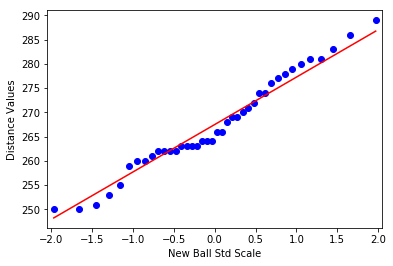

In [27]:
import statsmodels.api as sm
import pylab

sm.qqplot(df['New'], loc = np.mean(df['New']), scale = np.std(df['New']), line='s',xlabel='New Ball Std Scale',ylabel='Distance Values')
pylab.show()

#another way of checking normaility  visually instead of shapiro test tHis graph is for New ball's data normaility check

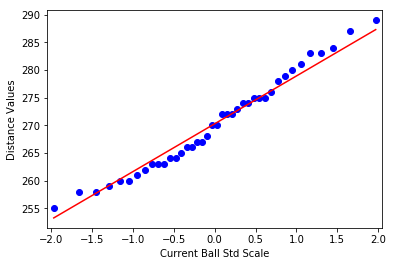

In [28]:
import statsmodels.api as sm
import pylab

sm.qqplot(df['Current'], loc = np.mean(df['Current']), scale = np.std(df['Current']), line='s',xlabel='Current Ball Std Scale',ylabel='Distance Values')
pylab.show()

(array([2., 1., 0., 1., 0., 1., 0., 0., 0., 1., 2., 1., 4., 4., 3., 0., 2.,
        0., 1., 2., 1., 1., 1., 0., 2., 0., 1., 1., 1., 1., 1., 2., 0., 1.,
        0., 0., 1., 0., 0., 1.]),
 array([250.   , 250.975, 251.95 , 252.925, 253.9  , 254.875, 255.85 ,
        256.825, 257.8  , 258.775, 259.75 , 260.725, 261.7  , 262.675,
        263.65 , 264.625, 265.6  , 266.575, 267.55 , 268.525, 269.5  ,
        270.475, 271.45 , 272.425, 273.4  , 274.375, 275.35 , 276.325,
        277.3  , 278.275, 279.25 , 280.225, 281.2  , 282.175, 283.15 ,
        284.125, 285.1  , 286.075, 287.05 , 288.025, 289.   ]),
 <a list of 40 Patch objects>)

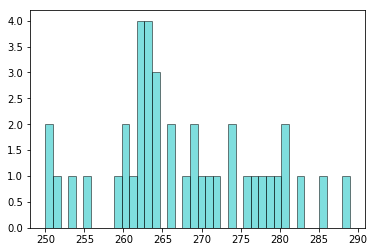

In [12]:
plt.hist(df['New'], bins=40, color='c', edgecolor='k', alpha=0.5)

(array([1., 0., 0., 2., 1., 2., 0., 1., 1., 3., 2., 1., 2., 0., 2., 1., 0.,
        2., 0., 0., 3., 1., 2., 3., 1., 0., 0., 1., 1., 1., 1., 0., 2., 0.,
        1., 0., 0., 1., 0., 1.]),
 array([255.  , 255.85, 256.7 , 257.55, 258.4 , 259.25, 260.1 , 260.95,
        261.8 , 262.65, 263.5 , 264.35, 265.2 , 266.05, 266.9 , 267.75,
        268.6 , 269.45, 270.3 , 271.15, 272.  , 272.85, 273.7 , 274.55,
        275.4 , 276.25, 277.1 , 277.95, 278.8 , 279.65, 280.5 , 281.35,
        282.2 , 283.05, 283.9 , 284.75, 285.6 , 286.45, 287.3 , 288.15,
        289.  ]),
 <a list of 40 Patch objects>)

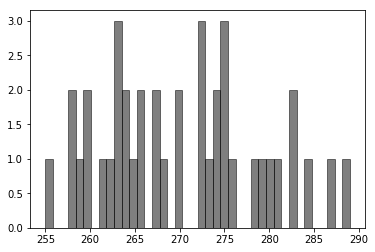

In [13]:
plt.hist(df['Current'], bins=40, color='k', edgecolor='k', alpha=0.5)

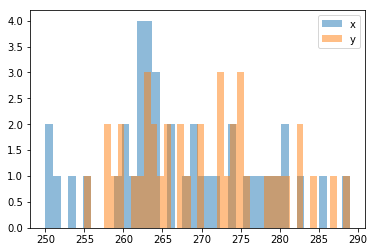

In [14]:
pyplot.hist(df['New'], bins=40, alpha=0.5, label='x')
pyplot.hist(df['Current'], bins=40, alpha=0.5, label='y')
pyplot.legend(loc='upper right')
pyplot.show()

After going through the t test procedure and checking for the levene test, it becomes clear that there is no significant
evidence to reject the null hypotheis. So we fail to reject the null hypothesis. 

This implies, the recommendation from my side, is not to introduce the new ball into the market.